# Setup

## Import and Constants

In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import sys
sys.path.append("../scripts/")
from helper import *

In [2]:
GRAY4 = '#646369'
GRAY5 = '#76787B'
GENDER_0 = '#59AB61'
GENDER_1 = '#3791AB'
ABOVE65_0 = '#74F782'
ABOVE65_1 = '#5CD5F7'
ICU_0 = '#ADA476'
ICU_1 = '#FF4336'

ICU_0_LABEL = 'Não Admitido na UTI'
ICU_1_LABEL = 'Admitido na UTI'

## Load Data

In [3]:
path_dados = '../raw_data/Kaggle_Sirio_Libanes_ICU_Prediction.xlsx'
dados = pd.read_excel(path_dados)
dados["PATIENT_VISIT_IDENTIFIER"] = dados["PATIENT_VISIT_IDENTIFIER"].astype("category")
dados["AGE_ABOVE65"] = dados["AGE_ABOVE65"].astype("category")
dados["AGE_PERCENTIL"] = dados["AGE_PERCENTIL"].astype("category")
dados.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1


# Exploratory Data Analysis

Os dados são divididos em 4 grupos:
* Informação demográfica - 3 variáveis
* Doenças pré-existentes - 9 variáveis
* Resultados do exame de sangue - 36 variáveis
* Sinais vitais - 6 variáveis

Cada linha dos dados representa um paciente em uma janela de tempo (Coluna `WINDOW`) e como resultado, temos que o paciênte foi ou não transferido para UTI. (Coluna `ICU`).

## Informações demográficas

Pegando apenas a primeira linha por paciente, dado que esses dados são invariáveis a cada hora

In [4]:
def prepare_window(rows):
    if(np.any(rows['ICU'])):
        rows.loc[rows['WINDOW']=='0-2', 'ICU'] = 1
    return rows.loc[rows['WINDOW']=='0-2']

demographic_columns = ['AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER', 'ICU']
demographic_data = dados.groupby('PATIENT_VISIT_IDENTIFIER').apply(prepare_window).reset_index(drop=True)[demographic_columns]
demographic_data#.head()

,AGE_ABOVE65,AGE_PERCENTIL,GENDER,ICU
0,1,60th,0,1
1,1,90th,1,1
2,0,10th,0,1
3,0,40th,1,0
4,0,10th,0,0
...,...,...,...,...
380,0,40th,1,1
381,1,Above 90th,0,0
382,0,50th,0,1
383,0,40th,1,0


In [5]:
pd.crosstab(dados['GENDER'], [dados['WINDOW'], dados['ICU']])

WINDOW  0-2      2-4      4-6     6-12     ABOVE_12     
ICU       0   1    0   1    0   1    0   1        0    1
GENDER                                                  
0       219  24  201  42  178  65  157  86      108  135
1       134   8  125  17  108  34   98  44       82   60

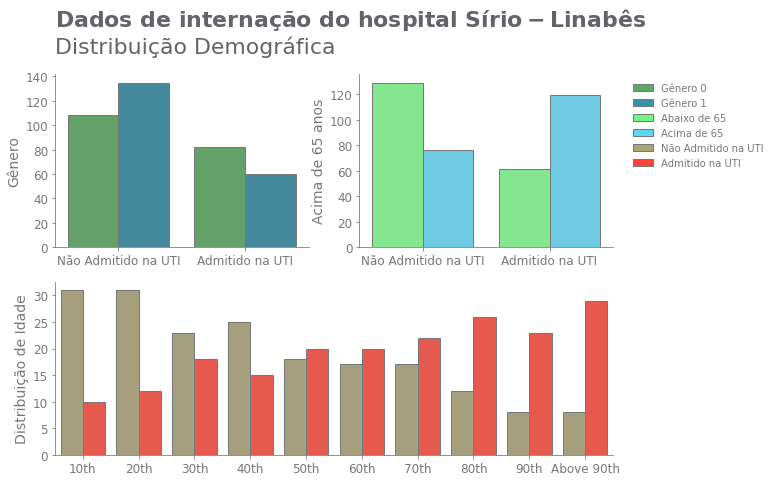

In [6]:
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 1, 2)
axis = [ax1, ax2, ax3]
g = sns.countplot(data=demographic_data, ax=ax1, x="GENDER", hue='ICU', palette=[GENDER_0, GENDER_1], edgecolor=GRAY5);
g = sns.countplot(data=demographic_data, ax=ax2, x="AGE_ABOVE65", hue='ICU', palette=[ABOVE65_0, ABOVE65_1], edgecolor=GRAY5);
g = sns.countplot(data=demographic_data, ax=ax3, x="AGE_PERCENTIL", hue='ICU', palette=[ICU_0, ICU_1], edgecolor=GRAY5);
xticks_g = [ICU_0_LABEL, ICU_1_LABEL]
ax1.set_xticklabels(xticks_g, fontsize=12)
ax2.set_xticklabels(xticks_g, fontsize=12)

suptitle = 'Dados de internação do hospital Sírio-Linabês'
subtitle = 'Distribuição Demográfica'
y_label = ['Gênero', 'Acima de 65 anos', 'Distribuição de Idade']
presentation(fig=fig, ax=axis, y_label=y_label, title=suptitle, subtitle=subtitle, grid=False)
sns.despine()

gen_0 = mpatches.Patch(facecolor=GENDER_0, edgecolor=GRAY5, label="Gênero 0")
gen_1 = mpatches.Patch(facecolor=GENDER_1, edgecolor=GRAY5, label="Gênero 1")
abv65_0 = mpatches.Patch(facecolor=ABOVE65_0, edgecolor=GRAY5, label="Abaixo de 65")
abv65_1 = mpatches.Patch(facecolor=ABOVE65_1, edgecolor=GRAY5, label="Acima de 65")
icu_0 = mpatches.Patch(facecolor=ICU_0, edgecolor=GRAY5, label=ICU_0_LABEL)
icu_1 = mpatches.Patch(facecolor=ICU_1, edgecolor=GRAY5, label=ICU_1_LABEL)
plt.sca(ax2)
plt.legend(handles=[gen_0, gen_1, abv65_0, abv65_1, icu_0, icu_1], loc='upper right', bbox_to_anchor=(1.63, 1.0), frameon=False, labelcolor=GRAY5)
plt.show()

Pelo dados, vamos que dá uma discrepância grande entre os gêneros 0 e 1. Possívelmente temos como genêro 0 como masculino e 1 como feminino, visto que [REF] apontam como o gênero masculino sendo maissucetivel a infecção por COVID-19. Além disto, há uma clara diferença na admissão da UTI para o sexo masculino.

Embora os números entre acima de 65 anos e abaixo sejam semelhantes, vale notar que a população acima de 65 anos é muito menor em relação aos demais grupos etários. O que indica uma maior susceptibilidade dada a idade. 

A distribuição de idade também confirma essa hipótese.

Genero Ref:
* https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7271824/
* https://www.frontiersin.org/articles/10.3389/fpubh.2020.00152/full?fbclid=IwAR0j28d7CvO1w_CKJyFyyaE4PkjERGrRNZQe4TdNo_XmBSQ_H-8ZQM_pjZ4
* https://www.nature.com/articles/s41467-020-19741-6

## Doenças Pré-Existentes

In [7]:
def prepare_window(rows):
    if(np.any(rows['ICU'])):
        rows.loc[rows['WINDOW']=='0-2', 'ICU'] = 1
    return rows.loc[rows['WINDOW']=='0-2']

preexisting_disease_columns = ['PATIENT_VISIT_IDENTIFIER', 'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3', 'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6', 'HTN', 'IMMUNOCOMPROMISED', 'OTHER', 'ICU']
preexisting_disease_data = dados.groupby('PATIENT_VISIT_IDENTIFIER').apply(prepare_window).reset_index(drop=True)[preexisting_disease_columns]#.reset_index()
preexisting_disease_data
# preexisting_disease_data_melt = preexisting_disease_data.melt(id_vars=['PATIENT_VISIT_IDENTIFIER', 'ICU'], value_vars=preexisting_disease_columns[:-1],
#         var_name='Doenças Pré-Existentes', value_name='value')
# preexisting_disease_data_melt

,PATIENT_VISIT_IDENTIFIER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ICU
0,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1
1,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
3,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0
4,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
380,380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
381,381,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0
382,382,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
383,383,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


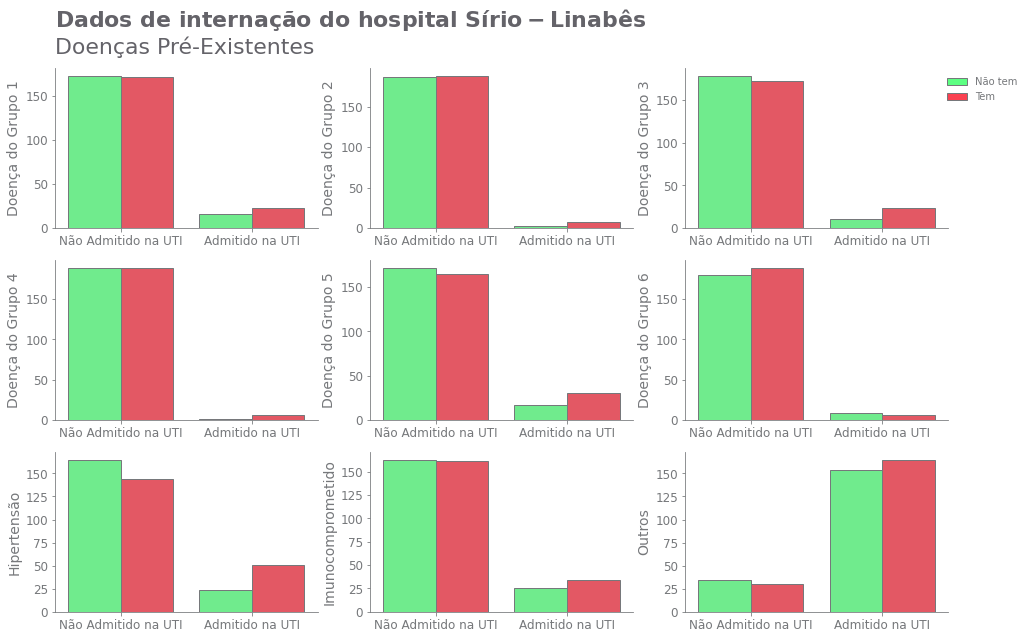

In [8]:
xticks_g = [ICU_0_LABEL, ICU_1_LABEL]
preexisting_disease_columns = ['DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3', 'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6', 'HTN', 'IMMUNOCOMPROMISED', 'OTHER']
preexisting_disease_labels = ['Doença do Grupo 1', 'Doença do Grupo 2', 'Doença do Grupo 3', 'Doença do Grupo 4', 'Doença do Grupo 5', 'Doença do Grupo 6', 'Hipertensão', 'Imunocomprometido', 'Outros']
suptitle = 'Dados de internação do hospital Sírio-Linabês'
subtitle = 'Doenças Pré-Existentes'
DISEASE_0 = '#5CFF82'
DISEASE_1 = '#FA4151'

fig, ((ax11, ax12, ax13),(ax21,ax22,ax23),(ax31,ax32,ax33)) = plt.subplots(nrows=3, ncols=3, figsize=(16, 10)) #(10, 6)
axes = [ax11, ax12, ax13,ax21,ax22,ax23,ax31,ax32,ax33]
for i, ax in enumerate(axes):
    sns.countplot(data=preexisting_disease_data, x=preexisting_disease_columns[i], hue='ICU',ax=ax, palette=[DISEASE_0, DISEASE_1], edgecolor=GRAY5)
    ax.set_xticklabels(xticks_g, fontsize=12)
presentation(fig=fig, ax=axes, y_label=preexisting_disease_labels, title=suptitle, subtitle=subtitle,
             title_position = 0.085, grid=False, legend=False)

disease_0 = mpatches.Patch(facecolor=DISEASE_0, edgecolor=GRAY5, label="Não tem")
disease_1 = mpatches.Patch(facecolor=DISEASE_1, edgecolor=GRAY5, label="Tem")
plt.sca(ax13)
plt.legend(handles=[disease_0, disease_1], loc='upper right', bbox_to_anchor=(1.3, 1.0), frameon=False, labelcolor=GRAY5)

sns.despine()

## Sinais Vitais

Temos 6 tipos de sinais:

* Pressão Arterial Diastólica (PAD)
* Pressão Arterial Sistólica (PAS)
* Frequência Cardiaca
* Saturação do Oxigênio
* Frequência Respiratória
* Temperatura

Deste dados, temos:

* Minimo
* Máximo
* Média
* Mediana
* Diferença
    * É a diferença entre os valores máximo e mínimo (`max - min`)
* Diferença Relativa
    * É o quociente entre diferença e mediana (`diff / median`)

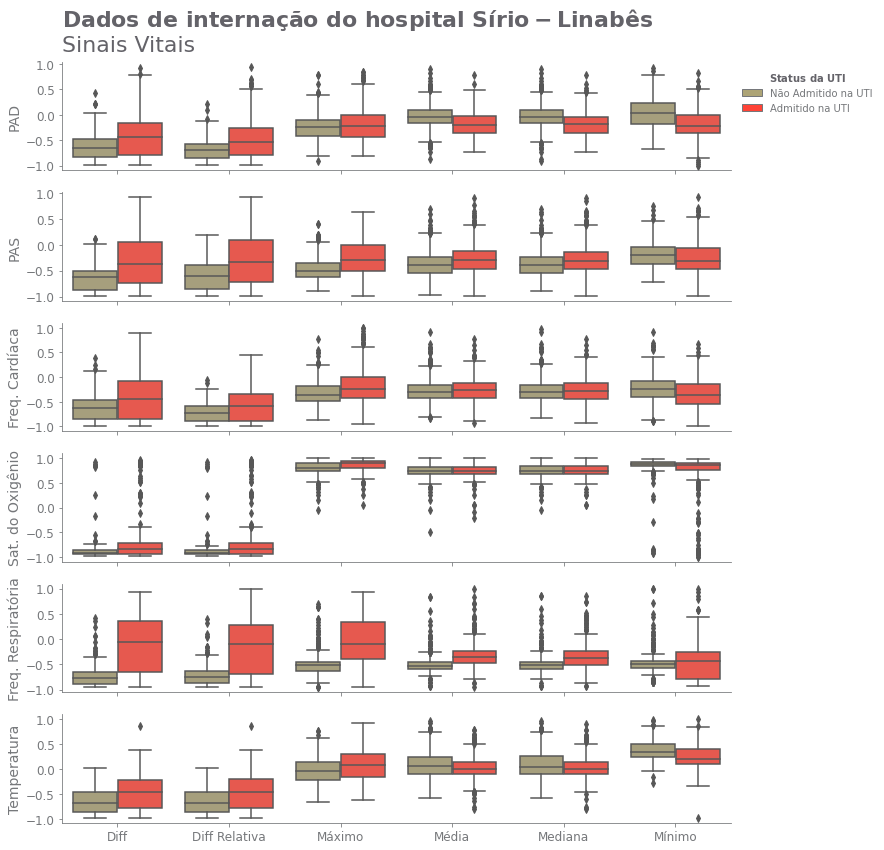

In [9]:
attributes_suffix = ['DIFF', 'DIFF_REL', 'MAX', 'MEAN', 'MEDIAN', 'MIN']
vital_signs = ['BLOODPRESSURE_DIASTOLIC', 'BLOODPRESSURE_SISTOLIC', 'HEART_RATE', 'OXYGEN_SATURATION', 'RESPIRATORY_RATE', 'TEMPERATURE']

attributes_label = ['Diff', 'Diff Relativa', 'Máximo', 'Média', 'Mediana', 'Mínimo']
vital_signs_label = ['PAD', 'PAS', 'Freq. Cardíaca', 'Sat. do Oxigênio', 'Freq. Respiratória', 'Temperatura']

suptitle = 'Dados de internação do hospital Sírio-Linabês'
subtitle = 'Sinais Vitais'

fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(nrows=6, ncols=1, figsize=(12, 14), sharex=True) #(10, 6)
axes = [ax1, ax2, ax3, ax4, ax5, ax6]
for i, vital in enumerate(vital_signs):
    vs_columns = [f'{vital}_{attr}' for attr in attributes_suffix]
    vs_melt = dados.melt(id_vars=['ICU'], value_vars=vs_columns, var_name='col', value_name='value').reset_index(drop=True)
    vs_melt['value'] = vs_melt['value'].replace(-1, np.nan)
    vs_melt['value'] = vs_melt['value'].replace(1, np.nan)
    sns.boxplot(x="col", y="value", hue='ICU', data=vs_melt, ax=axes[i], palette=[ICU_0, ICU_1])
ax6.set_xticklabels(attributes_label, fontsize=12)
presentation(fig=fig, ax=axes, y_label=vital_signs_label, title=suptitle, subtitle=subtitle,
             title_position = 0.055, grid=False, legend=False)

disease_0 = mpatches.Patch(facecolor=ICU_0, edgecolor=GRAY5, label=ICU_0_LABEL)
disease_1 = mpatches.Patch(facecolor=ICU_1, edgecolor=GRAY5, label=ICU_1_LABEL)
plt.sca(ax1)
leg = plt.legend(handles=[disease_0, disease_1], loc='upper right', bbox_to_anchor=(1.225, 1.0),
           frameon=False, labelcolor=GRAY5, title=suptitle_formatter('Status da UTI'))
plt.setp(leg.get_title(), color=GRAY4)

sns.despine()

## Resultados do exame de sangue

In [10]:
attributes_suffix = ['DIFF', 'MAX', 'MEAN', 'MEDIAN', 'MIN']
blood_results = ['ALBUMIN', 'BE_ARTERIAL', 'BE_VENOUS', 'BIC_ARTERIAL', 'BIC_VENOUS', 'BILLIRUBIN', 'BLAST', 'CALCIUM', 'CREATININ', 'FFA', 'GGT', 'GLUCOSE', 'HEMATOCRITE', 'HEMOGLOBIN', 'INR', 'LACTATE', 'LEUKOCYTES', 'LINFOCITOS', 'NEUTROPHILES', 'P02_ARTERIAL', 'P02_VENOUS', 'PC02_ARTERIAL', 'PC02_VENOUS', 'PCR', 'PH_ARTERIAL', 'PH_VENOUS', 'PLATELETS', 'POTASSIUM', 'SAT02_ARTERIAL', 'SAT02_VENOUS', 'SODIUM', 'TGO', 'TGP', 'TTPA', 'UREA', 'DIMER']
blood_results_columns = [f'{blood}_{attr}' for blood in blood_results for attr in attributes_suffix]

blood_results_data = dados[blood_results_columns].copy()
blood_results_data = blood_results_data.replace(-1, np.nan)
blood_results_data = blood_results_data.replace(1, np.nan)
blood_results_data.describe()


,ALBUMIN_DIFF,ALBUMIN_MAX,ALBUMIN_MEAN,ALBUMIN_MEDIAN,ALBUMIN_MIN,BE_ARTERIAL_DIFF,BE_ARTERIAL_MAX,BE_ARTERIAL_MEAN,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MIN,...,UREA_DIFF,UREA_MAX,UREA_MEAN,UREA_MEDIAN,UREA_MIN,DIMER_DIFF,DIMER_MAX,DIMER_MEAN,DIMER_MEDIAN,DIMER_MIN
count,0.0,821.000000,821.000000,821.000000,821.000000,0.0,75.000000,75.000000,75.000000,75.000000,...,0.0,819.000000,819.000000,819.000000,819.000000,0.0,786.000000,786.000000,786.000000,786.000000
mean,NaN,0.528527,0.528527,0.528527,0.528527,NaN,-0.599715,-0.599715,-0.599715,-0.599715,...,NaN,-0.832208,-0.832208,-0.832208,-0.832208,NaN,-0.954682,-0.954682,-0.954682,-0.954682
std,NaN,0.224100,0.224100,0.224100,0.224100,NaN,0.373107,0.373107,0.373107,0.373107,...,NaN,0.136758,0.136758,0.136758,0.136758,NaN,0.104869,0.104869,0.104869,0.104869
min,NaN,-1.000000,-1.000000,-1.000000,-1.000000,NaN,-0.989305,-0.989305,-0.989305,-0.989305,...,NaN,-0.980723,-0.980723,-0.980723,-0.980723,NaN,-0.999692,-0.999692,-0.999692,-0.999692
25%,NaN,0.605263,0.605263,0.605263,0.605263,NaN,-0.866310,-0.866310,-0.866310,-0.866310,...,NaN,-0.898795,-0.898795,-0.898795,-0.898795,NaN,-0.978029,-0.978029,-0.978029,-0.978029
50%,NaN,0.605263,0.605263,0.605263,0.605263,NaN,-0.689840,-0.689840,-0.689840,-0.689840,...,NaN,-0.874699,-0.874699,-0.874699,-0.874699,NaN,-0.978029,-0.978029,-0.978029,-0.978029
75%,NaN,0.605263,0.605263,0.605263,0.605263,NaN,-0.475936,-0.475936,-0.475936,-0.475936,...,NaN,-0.814458,-0.814458,-0.814458,-0.814458,NaN,-0.966696,-0.966696,-0.966696,-0.966696
max,NaN,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,...,NaN,0.561446,0.561446,0.561446,0.561446,NaN,0.513241,0.513241,0.513241,0.513241


Valor de Diff não deve ter sido preenchido para nenhuma medição. Outro Ponto são as valores MAX, MEAN, MEDIAN e MIN que parecem serem iguais.

### Colunas DIFF

In [11]:
blood_results_diff_columns = [f'{blood}_DIFF' for blood in blood_results]

blood_results_diff_data = dados[blood_results_diff_columns].copy()
blood_results_diff_data = blood_results_diff_data.replace(-1, np.nan)
blood_results_diff_data = blood_results_diff_data.replace(1, np.nan)
blood_results_diff_data.sum().sum()

0.0

De fato, essas colunas são vazias

### Valores de MAX, MEAN, MEDIAN e MIN

In [12]:
attributes_suffix = ['MAX', 'MEAN', 'MEDIAN', 'MIN']

eq_columns = []
neq_columns = []

for blood in blood_results:#[:3]:
    br_columns = [f'{blood}_{attr}' for attr in attributes_suffix]
    if all([blood_results_data[br_columns[0]].equals(blood_results_data[col]) for col in br_columns[1:]]):
        eq_columns.append(blood)
    else:
        neq_columns.append(blood)
print(f'Colunuas com valores iguais entre os atributos: {eq_columns}')
print(f'Colunuas com valores iguais diferente os atributos: {neq_columns}')

Colunuas com valores iguais entre os atributos: ['ALBUMIN', 'BE_ARTERIAL', 'BE_VENOUS', 'BIC_ARTERIAL', 'BIC_VENOUS', 'BILLIRUBIN', 'BLAST', 'CALCIUM', 'CREATININ', 'FFA', 'GGT', 'GLUCOSE', 'HEMATOCRITE', 'HEMOGLOBIN', 'INR', 'LACTATE', 'LEUKOCYTES', 'LINFOCITOS', 'NEUTROPHILES', 'P02_ARTERIAL', 'P02_VENOUS', 'PC02_ARTERIAL', 'PC02_VENOUS', 'PCR', 'PH_ARTERIAL', 'PH_VENOUS', 'PLATELETS', 'POTASSIUM', 'SAT02_ARTERIAL', 'SAT02_VENOUS', 'SODIUM', 'TGO', 'TGP', 'TTPA', 'UREA', 'DIMER']
Colunuas com valores iguais diferente os atributos: []


Como todos esses valores são iguais, vamos selecionar apenas 1 deles.

### Quantidade de valores amostrados

Há muitos valores que não foram amostrados para todos os usuários, como `BLAST_MEAN` e  `BE_ARTERIAL_MEAN`

In [13]:
blood_results = ['ALBUMIN', 'BE_ARTERIAL', 'BE_VENOUS', 'BIC_ARTERIAL', 'BIC_VENOUS', 'BILLIRUBIN', 'BLAST', 'CALCIUM', 'CREATININ', 'FFA', 'GGT', 'GLUCOSE', 'HEMATOCRITE', 'HEMOGLOBIN', 'INR', 'LACTATE', 'LEUKOCYTES', 'LINFOCITOS', 'NEUTROPHILES', 'P02_ARTERIAL', 'P02_VENOUS', 'PC02_ARTERIAL', 'PC02_VENOUS', 'PCR', 'PH_ARTERIAL', 'PH_VENOUS', 'PLATELETS', 'POTASSIUM', 'SAT02_ARTERIAL', 'SAT02_VENOUS', 'SODIUM', 'TGO', 'TGP', 'TTPA', 'UREA', 'DIMER']
blood_results_columns = [f'{blood}_MEAN' for blood in blood_results]
blood_results_by_count = blood_results_data[blood_results_columns].count().sort_values().to_frame().reset_index()#.groupby(0).count()
blood_results_by_count = blood_results_by_count.groupby(0)['index'].apply(lambda x: ', '.join(x)).to_frame().reset_index()
blood_results_by_count.columns = ['Qtd de Amostras', 'Resultados de Sangue']
blood_results_by_count

,Qtd de Amostras,Resultados de Sangue
0,6,BLAST_MEAN
1,75,BE_ARTERIAL_MEAN
2,238,BE_VENOUS_MEAN
3,318,LACTATE_MEAN
4,786,DIMER_MEAN
5,805,SAT02_ARTERIAL_MEAN
6,812,PCR_MEAN
7,818,"POTASSIUM_MEAN, PC02_VENOUS_MEAN"
8,819,"TTPA_MEAN, TGO_MEAN, SODIUM_MEAN, PH_VENOUS_ME..."
9,820,"TGP_MEAN, SAT02_VENOUS_MEAN, CALCIUM_MEAN, PLA..."


`BLAST_MEAN` tem apenas 6 valores no dataset inteiro, enquanto que `LEUKOCYTES_MEAN` tem 821 amostras válidas.

NameError: name 'mpatches' is not defined

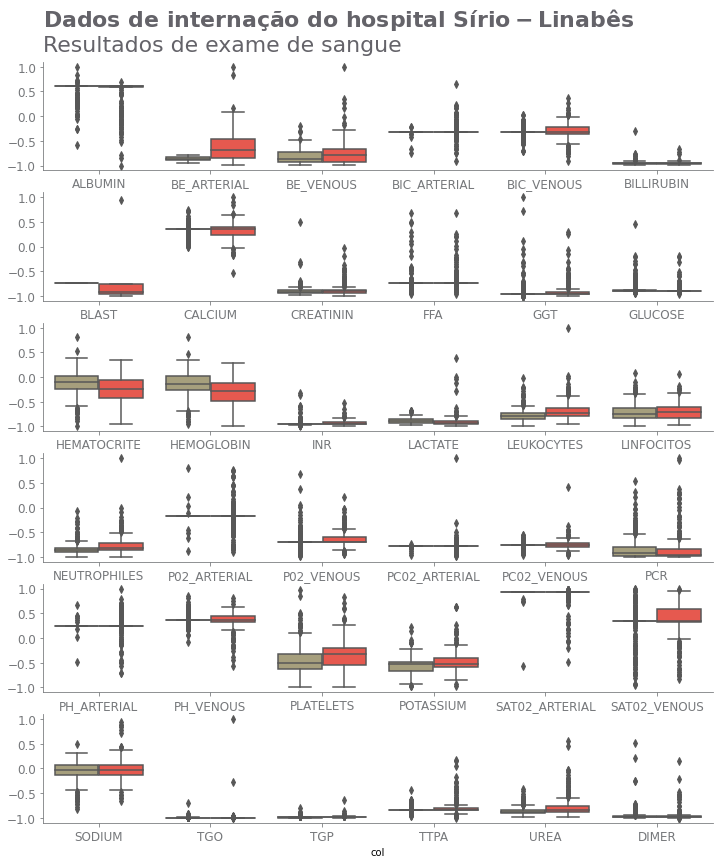

In [14]:
suptitle = 'Dados de internação do hospital Sírio-Linabês'
subtitle = 'Resultados de exame de sangue'

fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(12, 14))
blood_results_lines = np.array_split(blood_results_columns, 6)
blood_results_labels = np.array_split(blood_results, 6)
y_label = [None]*6

for i, blood in enumerate(blood_results_lines):
    br_melt = dados.melt(id_vars=['ICU'], value_vars=blood, var_name='col', value_name='value').reset_index(drop=True)
    br_melt['value'] = br_melt['value'].replace(-1, np.nan)
    br_melt['value'] = br_melt['value'].replace(1, np.nan)
    sns.boxplot(x="col", y="value", hue='ICU', data=br_melt, ax=axes[i], palette=[ICU_0, ICU_1])
    axes[i].set_xticklabels(blood_results_labels[i], fontsize=12)
presentation(fig=fig, ax=axes.tolist(), y_label=y_label, title=suptitle, subtitle=subtitle,
             title_position = 0.055, grid=False, legend=False)
sns.despine()

icu_color = [ICU_0, ICU_1]
icu_label = [ICU_0_LABEL, ICU_1_LABEL]
legend_formatter(axes[0], icu_color, icu_label, bbox=(1.205, 1.0), title='Status da UTI')
axes[-1].set_xlabel('')
plt.show()

In [ ]:
a = dados.melt(id_vars=['ICU'], value_vars=blood_results_columns, var_name='col', value_name='value').reset_index(drop=True)#.dropna()
a['value'] = a['value'].replace(-1, np.nan)
a['value'] = a['value'].replace(1, np.nan)
a = a.dropna()
a

In [ ]:
pd.crosstab(a['col'], a['ICU'])